## Phân tích đoạn văn bản bằng nltk.text

In [1]:
%config IPCompleter.greedy = True

from nltk.tokenize import word_tokenize
from nltk.text import Text

In [2]:
my_str = "Hi. My name is Chung. I am 24 years old. I have studied Computer Science at Hanoi University of Science and Technology."
tokens = word_tokenize(my_str)               # Chuyen xau thanh cac tokens
tokens = [word.lower() for word in tokens]   # Chuyen cac tokens ve dang chu thuong
tokens[:4]

['hi', '.', 'my', 'name']

In [3]:
t = Text(tokens)                             # Chuyen day cac tokens ve thanh mot cau                               
t

<Text: hi . my name is chung . i...>

In [4]:
t.concordance('our')                         # Xac dinh ngu canh cua mot tu nao day trong cau

no matches


In [5]:
t.collocations()                             # Xac dinh cac tu tao thanh mot cum tu

In [6]:
t.count('you')                               # Dem so luong mot tu nao day trong cau

0

In [7]:
t.index('chung')                             # Tim chi so cua mot tu nao day trong cau

5

In [8]:
t.similar('years')                           # Tim tu co cung ngu canh voi mot tu nao day trong cau

In [9]:
t.dispersion_plot(['you', 'I', 'we'])        # Vi tri cua mot so tu nhat dinh nao day trong cau

<Figure size 640x480 with 1 Axes>

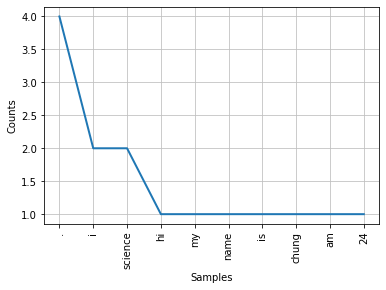

In [10]:
t.plot(10)                                   # Tan suat 10 tu xuat hien nhieu nhat trong cau

In [11]:
t.vocab()                                    # Danh sach cac tu trong cau 

FreqDist({'.': 4, 'i': 2, 'science': 2, 'hi': 1, 'my': 1, 'name': 1, 'is': 1, 'chung': 1, 'am': 1, '24': 1, ...})

## Xây dựng n-grams

In [12]:
my_str = 'Xin chào. Tôi là Chung. Tôi 24 tuổi. Tôi học Khoa học máy tính tại Trường Đại học Bách Khoa Hà Nội.'
my_str = my_str.lower()

In [13]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[a-zA-Z0-9àôổọáíạườộđ]+')   # Tao tokenizer voi token duoc dinh nghia truoc boi mot regex
tokens = tokenizer.tokenize(my_str)                      # Xac dinh danh sach cac tokens trong cau
tokens

['xin',
 'chào',
 'tôi',
 'là',
 'chung',
 'tôi',
 '24',
 'tuổi',
 'tôi',
 'học',
 'khoa',
 'học',
 'máy',
 'tính',
 'tại',
 'trường',
 'đại',
 'học',
 'bách',
 'khoa',
 'hà',
 'nội']

In [14]:
from nltk.util import ngrams
four_grams = []
for word in tokens:  
    # Tach ky tu trong mot token thanh cac bi-grams, chen ky tu * vao hai ben 
    four_grams.append(list(ngrams(word, 2, pad_left = True, pad_right = True, left_pad_symbol = '*', right_pad_symbol = '*')))
four_grams

[[('*', 'x'), ('x', 'i'), ('i', 'n'), ('n', '*')],
 [('*', 'c'), ('c', 'h'), ('h', 'à'), ('à', 'o'), ('o', '*')],
 [('*', 't'), ('t', 'ô'), ('ô', 'i'), ('i', '*')],
 [('*', 'l'), ('l', 'à'), ('à', '*')],
 [('*', 'c'), ('c', 'h'), ('h', 'u'), ('u', 'n'), ('n', 'g'), ('g', '*')],
 [('*', 't'), ('t', 'ô'), ('ô', 'i'), ('i', '*')],
 [('*', '2'), ('2', '4'), ('4', '*')],
 [('*', 't'), ('t', 'u'), ('u', 'ổ'), ('ổ', 'i'), ('i', '*')],
 [('*', 't'), ('t', 'ô'), ('ô', 'i'), ('i', '*')],
 [('*', 'h'), ('h', 'ọ'), ('ọ', 'c'), ('c', '*')],
 [('*', 'k'), ('k', 'h'), ('h', 'o'), ('o', 'a'), ('a', '*')],
 [('*', 'h'), ('h', 'ọ'), ('ọ', 'c'), ('c', '*')],
 [('*', 'm'), ('m', 'á'), ('á', 'y'), ('y', '*')],
 [('*', 't'), ('t', 'í'), ('í', 'n'), ('n', 'h'), ('h', '*')],
 [('*', 't'), ('t', 'ạ'), ('ạ', 'i'), ('i', '*')],
 [('*', 't'),
  ('t', 'r'),
  ('r', 'ư'),
  ('ư', 'ờ'),
  ('ờ', 'n'),
  ('n', 'g'),
  ('g', '*')],
 [('*', 'đ'), ('đ', 'ạ'), ('ạ', 'i'), ('i', '*')],
 [('*', 'h'), ('h', 'ọ'), ('ọ', 'c'),

In [15]:
four_grams = [word for sublist in four_grams for word in sublist]
four_grams[:10]

[('*', 'x'),
 ('x', 'i'),
 ('i', 'n'),
 ('n', '*'),
 ('*', 'c'),
 ('c', 'h'),
 ('h', 'à'),
 ('à', 'o'),
 ('o', '*'),
 ('*', 't')]

In [16]:
list_four_grams = four_grams
for i, val in enumerate(four_grams):
    list_four_grams[i] = ''.join(val)
list_four_grams

['*x',
 'xi',
 'in',
 'n*',
 '*c',
 'ch',
 'hà',
 'ào',
 'o*',
 '*t',
 'tô',
 'ôi',
 'i*',
 '*l',
 'là',
 'à*',
 '*c',
 'ch',
 'hu',
 'un',
 'ng',
 'g*',
 '*t',
 'tô',
 'ôi',
 'i*',
 '*2',
 '24',
 '4*',
 '*t',
 'tu',
 'uổ',
 'ổi',
 'i*',
 '*t',
 'tô',
 'ôi',
 'i*',
 '*h',
 'họ',
 'ọc',
 'c*',
 '*k',
 'kh',
 'ho',
 'oa',
 'a*',
 '*h',
 'họ',
 'ọc',
 'c*',
 '*m',
 'má',
 'áy',
 'y*',
 '*t',
 'tí',
 'ín',
 'nh',
 'h*',
 '*t',
 'tạ',
 'ại',
 'i*',
 '*t',
 'tr',
 'rư',
 'ườ',
 'ờn',
 'ng',
 'g*',
 '*đ',
 'đạ',
 'ại',
 'i*',
 '*h',
 'họ',
 'ọc',
 'c*',
 '*b',
 'bá',
 'ác',
 'ch',
 'h*',
 '*k',
 'kh',
 'ho',
 'oa',
 'a*',
 '*h',
 'hà',
 'à*',
 '*n',
 'nộ',
 'ội',
 'i*']

## Phát hiện ngôn ngữ

Phương thức 1. Đếm số lượng stop words

In [17]:
from nltk.corpus import stopwords
stopwords.readme().replace('\n', ' ')

'Stopwords Corpus  This corpus contains lists of stop words for several languages.  These are high-frequency grammatical words which are usually ignored in text retrieval applications.  They were obtained from: http://anoncvs.postgresql.org/cvsweb.cgi/pgsql/src/backend/snowball/stopwords/  The stop words for the Romanian language were obtained from: http://arlc.ro/resources/  The English list has been augmented https://github.com/nltk/nltk_data/issues/22  The German list has been corrected https://github.com/nltk/nltk_data/pull/49  A Kazakh list has been added https://github.com/nltk/nltk_data/pull/52  A Nepali list has been added https://github.com/nltk/nltk_data/pull/83  An Azerbaijani list has been added https://github.com/nltk/nltk_data/pull/100  A Greek list has been added https://github.com/nltk/nltk_data/pull/103  An Indonesian list has been added https://github.com/nltk/nltk_data/pull/112 '

In [18]:
stopwords.fileids()                                      # Danh sach cac ngon ngu

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [19]:
stopwords.raw('english').replace('\n', ' ')              # Tep cac stop words trong Tieng Anh

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't "

In [20]:
stopwords.words('spanish')[:16]                          # Mot so stop words trong tieng Tay Ban Nha

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no']

In [21]:
from nltk.tokenize import wordpunct_tokenize

text = "Yo no te puedo dar el dinero hoy, pero te lo voy a poder dar mañana."
tokens = wordpunct_tokenize(text)
words = [word.lower() for word in tokens]
words_set = set(words)                                   # Su dung set de ap dung ham intersection

language_ratios = {}
for language in stopwords.fileids():
    stopwords_set = set(stopwords.words(language))
    common_elements = words_set.intersection(stopwords_set)
    language_ratios[language] = len(common_elements)     # Dem so luong stop words ung voi moi ngon ngu

language_ratios

{'arabic': 0,
 'azerbaijani': 1,
 'danish': 0,
 'dutch': 1,
 'english': 2,
 'finnish': 1,
 'french': 1,
 'german': 0,
 'greek': 0,
 'hungarian': 2,
 'indonesian': 0,
 'italian': 2,
 'kazakh': 0,
 'nepali': 0,
 'norwegian': 1,
 'portuguese': 3,
 'romanian': 4,
 'russian': 0,
 'slovene': 0,
 'spanish': 7,
 'swedish': 0,
 'tajik': 0,
 'turkish': 0}

In [22]:
predicted_language = max(language_ratios, key = language_ratios.get)
predicted_language

'spanish'